In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
usa=pd.read_csv('train_USA.csv')
usa

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,test
0,601789,840.0,USA,84000001.0,84000250.0,07MS,84000,USA0104,8400000,1.0,...,603.887,590.013,526.884,538.381,574.989,528.995,532.473,0.90842,30APR19:15:44:40,NaN
1,601790,840.0,USA,84000001.0,84000304.0,07MS,84000,USA0104,8400000,1.0,...,421.561,415.035,421.276,463.113,405.657,418.138,411.110,0.88484,30APR19:15:44:40,NaN
2,601791,840.0,USA,84000001.0,84000353.0,07MS,84000,USA0104,8400000,1.0,...,485.181,552.538,509.284,514.612,489.004,488.026,511.318,0.86225,30APR19:15:44:40,NaN
3,601792,840.0,USA,84000001.0,84000536.0,07MS,84000,USA0104,8400000,1.0,...,441.900,478.056,440.221,434.849,460.214,423.104,431.563,0.86225,30APR19:15:44:40,NaN
4,601793,840.0,USA,84000001.0,84001240.0,07MS,84000,USA0104,8400000,1.0,...,529.315,610.651,495.613,484.914,591.632,553.535,511.791,0.86225,30APR19:15:44:40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,606622,840.0,USA,84000119.0,84005263.0,07MS,84000,USA0206,8400000,1.0,...,478.562,427.385,431.996,368.566,446.383,438.024,421.768,0.75871,30APR19:15:44:40,NaN
4834,606623,840.0,USA,84000119.0,84007857.0,07MS,84000,USA0206,8400000,1.0,...,453.503,463.633,395.839,443.449,383.282,456.320,436.538,0.74251,30APR19:15:44:40,NaN
4835,606624,840.0,USA,84000149.0,84000424.0,07MS,84000,USA0101,8400000,1.0,...,263.639,375.877,360.155,324.474,328.942,273.578,318.608,1.88302,30APR19:15:44:41,NaN
4836,606625,840.0,USA,84000149.0,84005320.0,07MS,84000,USA0101,8400000,1.0,...,327.675,371.371,319.884,288.969,360.170,311.001,346.356,1.88302,30APR19:15:44:41,NaN


In [18]:
escs_name=["HISEI","PARED","HOMEPOS"]
escs=usa[escs_name]
escs

,HISEI,PARED,HOMEPOS
0,28.60,14.0,-0.3235
1,59.89,12.0,-2.2036
2,39.02,16.0,-0.5709
3,26.60,12.0,-0.5057
4,76.65,16.0,0.5023
...,...,...,...
4833,68.70,16.0,-0.8134
4834,62.39,16.0,0.2263
4835,52.72,NaN,1.7790
4836,23.63,16.0,-1.0850


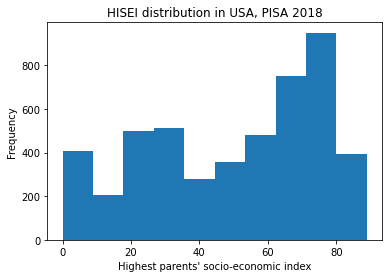

In [15]:
plt.hist(escs['HISEI'])
plt.xlabel("Highest parents' socio-economic index")
plt.ylabel("Frequency")
plt.title("HISEI distribution in USA, PISA 2018")
plt.savefig('HISEI usa.jpg')
plt.show()

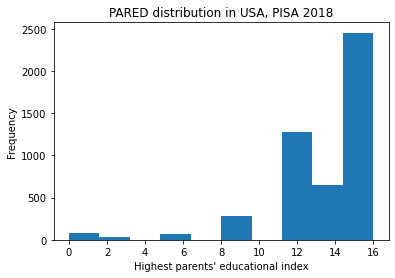

In [16]:
plt.hist(escs['PARED'])
plt.xlabel("Highest parents' educational index")
plt.ylabel("Frequency")
plt.title("PARED distribution in USA, PISA 2018")
plt.savefig('PARED usa.jpg')
plt.show()

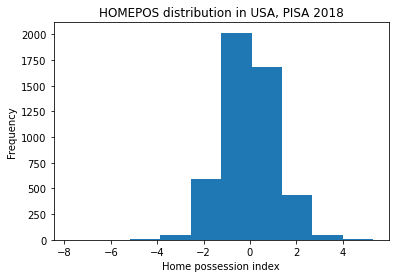

In [17]:
plt.hist(escs['HOMEPOS'])
plt.xlabel("Home possession index")
plt.ylabel("Frequency")
plt.title("HOMEPOS distribution in USA, PISA 2018")
plt.savefig('home usa.jpg')
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix

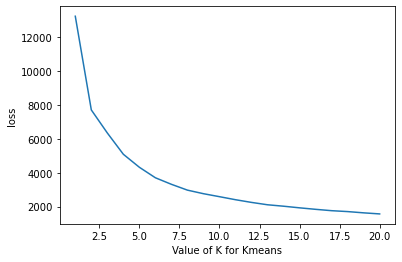

In [19]:
escs=escs.dropna(axis = 0)
X = escs.values.tolist()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
summary_3d = pca.fit_transform(X_scaled)

#figure with normalization
k_range = range(1, 21)
loss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled) 
    loss.append(kmeans.inertia_)
    
plt.plot(k_range, loss)    
plt.xlabel('Value of K for Kmeans')
plt.ylabel('loss')
plt.show()

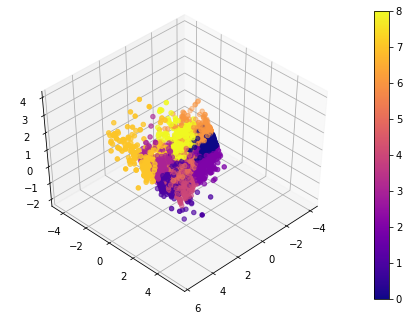

In [20]:
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


kmeans = KMeans(n_clusters = 9)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

fig = plt.figure()
ax = Axes3D(fig)
g = ax.scatter(summary_3d[:,0], summary_3d[:,1], summary_3d[:,2], c = clusters, cmap = 'plasma')
plt.colorbar(g, ax = ax)
ax.view_init(azim = 45, elev = 45)


In [21]:
escs['cluster'] = clusters

<ipython-input-21-fe982a3c0cbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escs['cluster'] = clusters


In [19]:
escs['cluster'] = escs['cluster'].replace([4,1,2,5,6,7,0,8,3],[0,1,2,3,4,5,6,7,8])

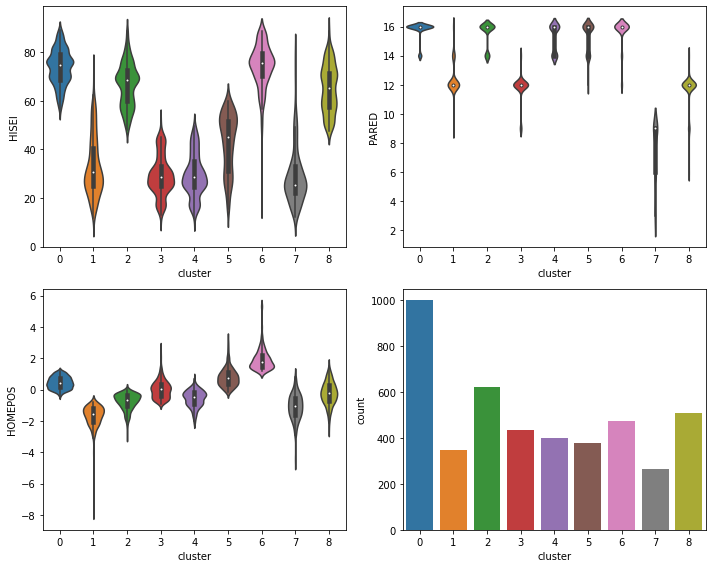

In [22]:
fig, axes = plt.subplots(2,2, figsize = (10,8))

sns.violinplot(data = escs, x = 'cluster', y = 'HISEI', ax = axes[0][0])
sns.violinplot(data = escs, x = 'cluster', y = 'PARED', ax = axes[0][1])
sns.violinplot(data = escs, x = 'cluster', y = 'HOMEPOS', ax = axes[1][0])
sns.countplot(data = escs, x = 'cluster', ax = axes[1][1])

plt.tight_layout()

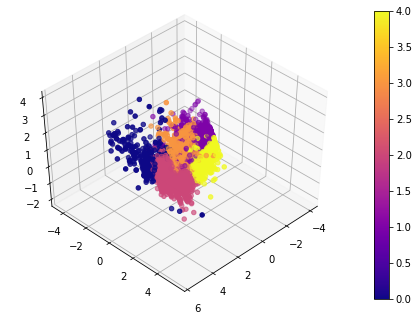

In [23]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

fig = plt.figure()
ax = Axes3D(fig)
g = ax.scatter(summary_3d[:,0], summary_3d[:,1], summary_3d[:,2], c = clusters, cmap = 'plasma')
plt.colorbar(g, ax = ax)
ax.view_init(azim = 45, elev = 45)

In [24]:
escs['cluster'] = clusters

<ipython-input-24-fe982a3c0cbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escs['cluster'] = clusters


In [24]:
escs['cluster'] = escs['cluster'].replace([2,1,4,0,3],[0,1,2,3,4])

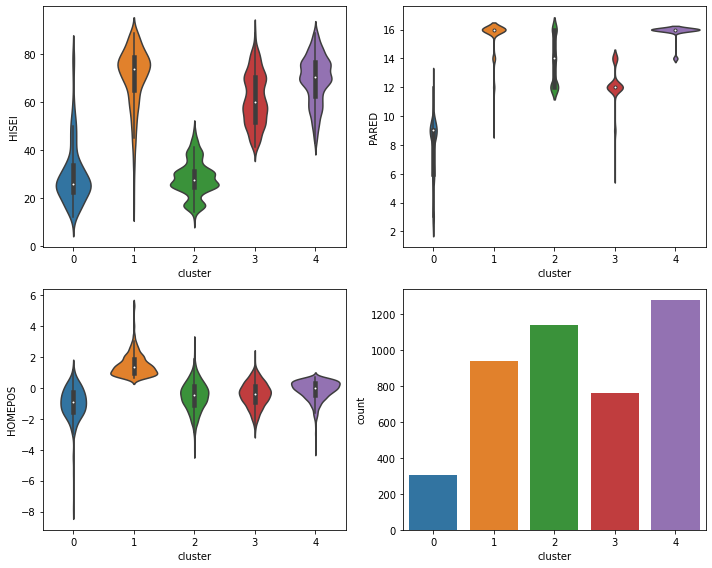

In [25]:
fig, axes = plt.subplots(2,2, figsize = (10,8))

sns.violinplot(data = escs, x = 'cluster', y = 'HISEI', ax = axes[0][0])
sns.violinplot(data = escs, x = 'cluster', y = 'PARED', ax = axes[0][1])
sns.violinplot(data = escs, x = 'cluster', y = 'HOMEPOS', ax = axes[1][0])
sns.countplot(data = escs, x = 'cluster', ax = axes[1][1])

plt.tight_layout()